In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import CondensedNearestNeighbour
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree
import time
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the waveform dataset
df = pd.read_csv('/content/waveform.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

In [5]:
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')


Split into features (X) and target (y). It then uses train_test_split function from scikit-learn to randomly draw 4000 training examples and keep 1000 waves for the test set.

In [6]:
# Extract the features and labels from the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
n_samples = X.shape[0]
n_train = 4000
n_test = 1000
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

**QUESTION 1**:Tune the best k of a kNN classifier by cross-validation (plot the accuracies over the validation subset
w.r.t. k) from 4000 randomly drawn training examples (you will keep apart 1000 waves for the test
set).

In [7]:
# Create a list of k values to test
k_values = list(range(1, 31))

In [9]:
# Create an empty list to store the cross-validation scores
cv_scores = []

In [10]:
# Perform 5-fold cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

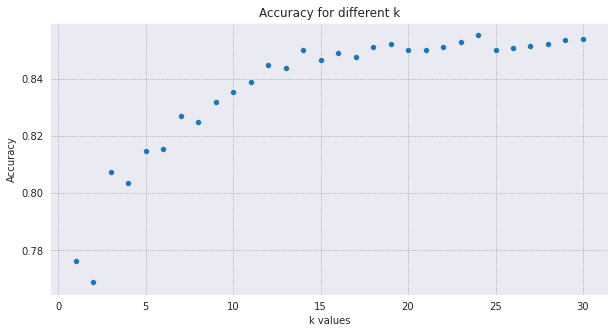

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot the cross-validation scores for each value of k
plt.figure(figsize=(10,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(k_values, cv_scores)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k')
plt.show()
plt.savefig('avg.png') # Saving the png

Next, it creates a list of k values to test (in this case, the values range from 1 to 100). It then creates an empty list to store the cross-validation scores and performs 5-fold cross-validation for each value of k. For each value of k, it trains a kNN classifier on the training set and calculates the cross-validation scores. The mean of the scores is then appended to the list of cross-validation scores.

Finally, the code plots the cross-validation scores for each value of k using Matplotlib. This allows you to visualize how the accuracy changes as you vary the value of k.

In [12]:
# Determine the best k value
best_k = k_values[cv_scores.index(max(cv_scores))]

print(f'The best k value is {best_k}')

The best k value is 24


In [13]:
# Train a kNN model on the training set with the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [14]:
# Evaluate the model on the test set
test_accuracy = knn.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.854


In [17]:
# Create a GaussianNB model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = gnb.predict(X_test)

# Compute the accuracy on the test data
accuracy = (y_pred == y_test).mean()

print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.822


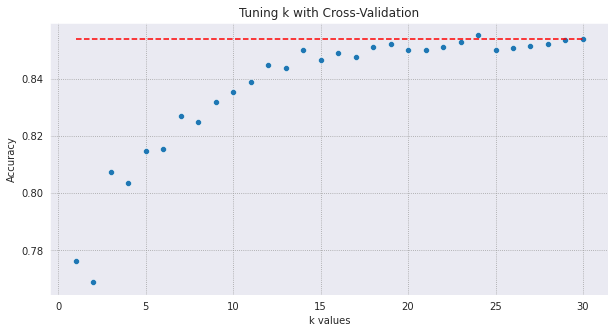

<Figure size 432x288 with 0 Axes>

In [57]:
# Plot the cross-validation scores for each value of k
plt.figure(figsize=(10,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(k_values, cv_scores)

# Plot the test accuracy as a dashed line on the same scatterplot
sns.lineplot(k_values, [test_accuracy] * len(k_values), linestyle='dashed',color = 'red')

plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title("Tuning k with Cross-Validation")
plt.show()
plt.savefig('accuracy.png')

This code creates a Gaussian Naive Bayes model, fits it on the training data, and predicts the labels on the test data. It then computes the accuracy of the model on the test data by comparing the predicted labels to the true labels.

In [19]:
# Create an empty list to store the test accuracies for the Bayesian model
test_accuracies_nb = []

In [20]:
# Compute the test accuracy for each value of k
for k in k_values:
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    test_accuracies_nb.append((y_pred == y_test).mean())

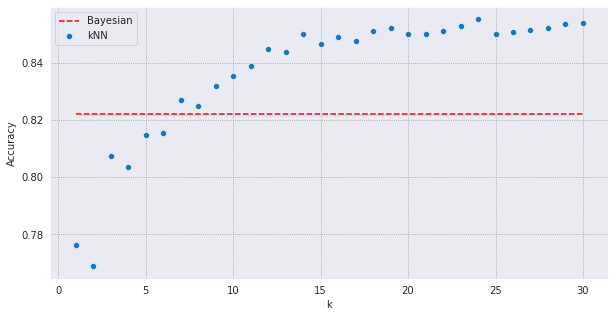

In [55]:
# Plot the cross-validation scores for kNN and the test accuracies for the Bayesian model
plt.figure(figsize=(10,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(k_values, cv_scores, label='kNN')
plt.plot(k_values, test_accuracies_nb, label='Bayesian',linestyle='dashed',color='red')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It plots both the cross-validation scores for kNN and the test accuracies for the Bayesian model on the same scatter plot. This will allow you to compare the performance of the two models for different values of k.

**QUESTION 2**.Reduce the complexity by running the Data Reduction algorithms studied in class on the training
data. Compare the accuracy (with a 1NN) on the 1000 test waves before and after reduction of the
training set

Here is an example of how to use the ***CondensedNearestNeighbour*** class to reduce the complexity of the kNN classifier:

In [22]:
print(X_train.shape)

(4000, 21)


In [23]:
# Create a CondensedNearestNeighbour instance
cnn = CondensedNearestNeighbour()

# Use the fit_resample method to reduce the complexity of the training set
X_train_reduced, y_train_reduced = cnn.fit_resample(X_train, y_train)

# Print the shape of the reduced training set
print(X_train_reduced.shape)

(1853, 21)


In [24]:
# Create an empty list to store the accuracies
accuracies = []

In [25]:
for k in k_values:
    # Create a CondensedNearestNeighbour instance
    cnn = CondensedNearestNeighbour()

    # Use the fit_resample method to reduce the complexity of the training set
    X_train_reduced, y_train_reduced = cnn.fit_resample(X_train, y_train)

    # Create a kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the reduced training set
    knn.fit(X_train_reduced, y_train_reduced)

    # Evaluate the classifier on the test set
    accuracy = knn.score(X_test, y_test)

    # Store the accuracy
    accuracies.append(accuracy)

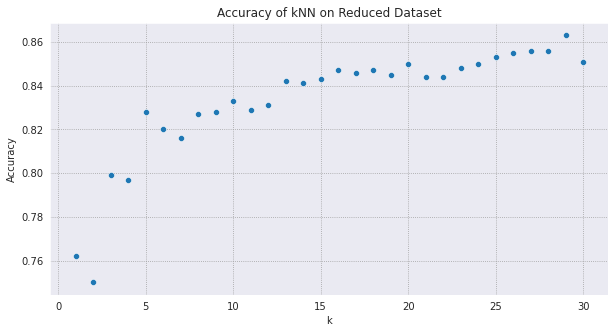

In [56]:
# Plot the accuracies versus k
plt.figure(figsize=(10,5))
accuracies = accuracies[:len(k_values)]
sns.scatterplot(x=k_values, y=accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN on Reduced Dataset')

# Save the plot to an image file
plt.savefig('cnn.png')

# Display the plot
plt.show()


In [27]:
# Create a kNN classifier with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# Train the classifier on the original training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
# Evaluate the classifier on the test set
accuracy_before = knn.score(X_test, y_test)
print(f'Accuracy before reduction: {accuracy_before:.3f}')

Accuracy before reduction: 0.763


In [30]:
# Create a CondensedNearestNeighbour instance
cnn = CondensedNearestNeighbour()

In [31]:
# Use the fit_resample method to reduce the complexity of the training set
X_train_reduced, y_train_reduced = cnn.fit_resample(X_train, y_train)

In [32]:
# Train the classifier on the reduced training set
knn.fit(X_train_reduced, y_train_reduced)

KNeighborsClassifier(n_neighbors=1)

In [33]:
# Evaluate the classifier on the test set
accuracy_after = knn.score(X_test, y_test)
print(f'Accuracy after reduction: {accuracy_after:.3f}')


Accuracy after reduction: 0.764


Here is an example of how to use the ***PCA*** class to reduce the complexity of the kNN classifier:

In [34]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the training data using PCA
pca = PCA(n_components=0.9)
X_train_reduced = pca.fit_transform(X_train)

In [35]:
# Reduce the dimensionality of the test data using PCA
X_test_reduced = pca.transform(X_test)

In [36]:
# Train the classifier on the reduced training data
knn.fit(X_train_reduced, y_train)

# Compute the accuracy on the test data
pca_accuracy = knn.score(X_test_reduced, y_test)

In [37]:
# Print the accuracies
print(f'Original accuracy: {accuracy_before:.3f}')
print(f'PCA accuracy: {pca_accuracy:.3f}')

Original accuracy: 0.763
PCA accuracy: 0.765


**QUESTION 3** Using the original dataset, compare (in terms of time) the two methods studied in class for
speeding-up the calculation of the 1NN with a brute force 1NN algorithm

In [38]:
def brute_force_1nn(X_train, X_test, y_train):
    """Calculate the 1NN using a brute force approach"""
    distances = cdist(X_train, X_test)
    indices = np.argmin(distances, axis=0)
    return y_train[indices]

In [39]:
def kdtree_1nn(X_train, X_test, y_train):
    """Calculate the 1NN using a KD Tree"""
    tree = KDTree(X_train)
    distances, indices = tree.query(X_test, k=1)
    return y_train[indices.flatten()]

In [40]:
# Measure the execution time of the brute force 1NN function
start_time = time.time()
y_pred_brute_force = brute_force_1nn(X_train, X_test, y_train)
time_brute_force = time.time() - start_time

In [41]:
# Measure the execution time of the KD Tree 1NN function
start_time = time.time()
y_pred_kdtree = kdtree_1nn(X_train, X_test, y_train)
time_kdtree = time.time() - start_time

In [42]:
print(f'Execution time for brute force 1NN: {time_brute_force:.2f} seconds')
print(f'Execution time for KD Tree 1NN: {time_kdtree:.2f} seconds')

Execution time for brute force 1NN: 0.07 seconds
Execution time for KD Tree 1NN: 0.09 seconds


In [43]:
# Convert the Pandas series to NumPy arrays
y_pred_brute_force = y_pred_brute_force.values
y_pred_kdtree = y_pred_kdtree.values

In [44]:
# Calculate the accuracy of the brute force 1NN function
y_pred_brute_force = y_pred_brute_force.reshape(y_test.shape)
accuracy_brute_force = np.mean(y_pred_brute_force == y_test)
print(f'Accuracy of brute force 1NN: {accuracy_brute_force:.2f}')

Accuracy of brute force 1NN: 0.76


In [45]:
# Calculate the accuracy of the KD Tree 1NN function
y_pred_kdtree = y_pred_kdtree.reshape(y_test.shape)
accuracy_kdtree = np.mean(y_pred_kdtree == y_test)
print(f'Accuracy of KD Tree 1NN: {accuracy_kdtree:.2f}')

Accuracy of KD Tree 1NN: 0.76


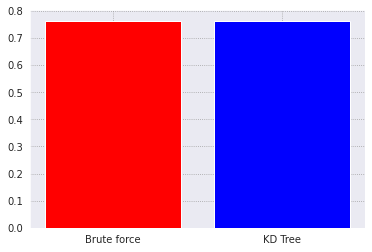

In [46]:
# Create a bar plot with the accuracies
plt.bar(['Brute force', 'KD Tree'], [accuracy_brute_force, accuracy_kdtree], color=['red', 'blue'])
plt.show()

This code compares the execution time of two methods for calculating the 1-nearest neighbor (1NN) of a set of points. The first method is a brute force approach, which calculates the 1NN by comparing the distance of each point in the training set to each point in the test set and selecting the point in the training set with the minimum distance. The second method is a KD Tree approach, which uses a KD Tree data structure to more efficiently find the 1NN.

**QUESTION 4** Generate artificially imbalancy in the training data and analyze the impact on the accuracy on the
1000 test waves. Tune k w.r.t. the F-measure and compare the performance with the accuracy

In [47]:
#Create empty lists to store the F-measures and accuracies
f_measures = []
accuracies = []

In [48]:
#Iterate over the k values
for k in k_values:
  # Artificially imbalanced the training data using SMOTE
  smote = SMOTE(sampling_strategy='minority')
  X_train_imbalanced, y_train_imbalanced = smote.fit_resample(X_train, y_train)
  # Create a k-nn classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  # Train the classifier on the imbalanced training data
  knn.fit(X_train_imbalanced, y_train_imbalanced)

  # Compute the F-measure and accuracy on the test data
  y_pred = knn.predict(X_test)
  f_measure = f1_score(y_test, y_pred, average='weighted')
  accuracy = knn.score(X_test, y_test)

  # Append the F-measure and accuracy to the lists
  f_measures.append(f_measure)
  accuracies.append(accuracy)


In [49]:
f_measure_max_index = np.argmax(f_measures)
f_measure_max = f_measures[f_measure_max_index]

accuracy_max_index = np.argmax(accuracies)
accuracy_max = accuracies[accuracy_max_index]

print(f"Maximum F-measure: {f_measure_max:.3f} at k = {k_values[f_measure_max_index]}")
print(f"Maximum accuracy: {accuracy_max:.3f} at k = {k_values[accuracy_max_index]}")


Maximum F-measure: 0.861 at k = 29
Maximum accuracy: 0.863 at k = 29


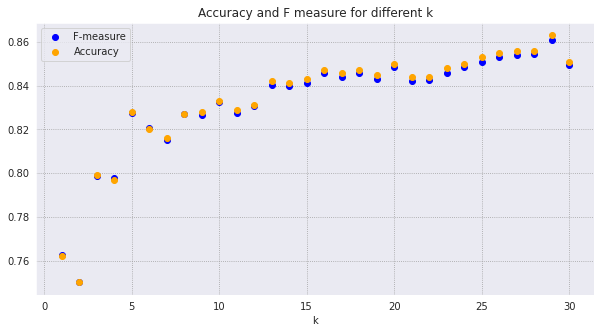

In [52]:
# Create a scatter plot with both F-measures and accuracies
plt.figure(figsize=(10,5))
plt.scatter(k_values, f_measures, color='blue', label='F-measure')
plt.scatter(k_values, accuracies, color='orange', label='Accuracy')
plt.xlabel('k')
plt.title("Accuracy and F measure for different k")
plt.savefig('fm.png') # Saving the png
plt.legend()
plt.show()